In [132]:
import numpy as np
import pandas as pd
import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [133]:
df = pd.read_csv("DataAnalyst.csv")
df

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\r\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\r\n\r\nProvides analytical and techni...,3.8,Visiting Nurse Service of New York\r\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\r\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\r\nRemote:Yes\r\n...,4.1,Celerity\r\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\r\n\r\nFanDuel Group is a ...,3.9,FanDuel\r\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\r\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,-1,-1
2249,2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:\r\nSenior Data Analyst (Corporate Au...,2.9,Arrow Electronics\r\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",-1
2250,2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",-1.0,Spiceorb,"Denver, CO",-1,-1,-1,-1,-1,-1,-1,-1,-1
2251,2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Summary\r\n\r\nResponsible for working cross-f...,3.1,Contingent Network Services\r\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),-1,-1


In [134]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2253.0,1126.000000,650.529400,0.0,563.0,1126.0,1689.0,2252.0
Rating,2253.0,3.160630,1.665228,-1.0,3.1,3.6,4.0,5.0
Founded,2253.0,1398.522858,901.929251,-1.0,-1.0,1979.0,2002.0,2019.0


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

In [136]:
df.isnull().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

Se va limpiando la base de datos.

Si las características X no sirven se van eliminando.

-Unnamed 0   

In [137]:
df.drop(labels=['Unnamed: 0'], axis='columns', inplace=True)
print('Dimensiones del Dataframe después de quitar la columna: {}'.format(df.shape))

Dimensiones del Dataframe después de quitar la columna: (2253, 15)


Algunas columnas contienen valores negativos, por lo que se modifica. Y se observa la gran dispersión que existe en los datos antes y después de modificar valores negativos con un diagrama de barras.

-Rating

-Founded

C:\Users\osdca\AppData\Local\Temp\ipykernel_24344\2147630866.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=df['Rating'])
C:\Users\osdca\AppData\Local\Temp\ipykernel_24344\2147630866.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=df['Rating'])


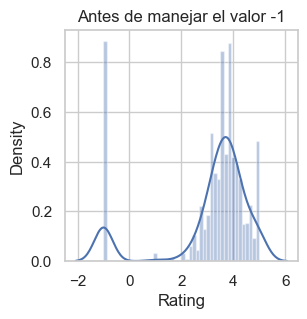

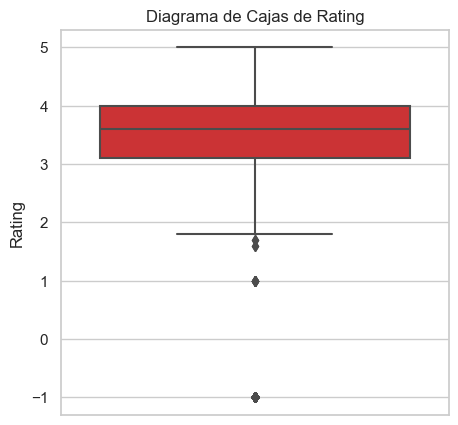

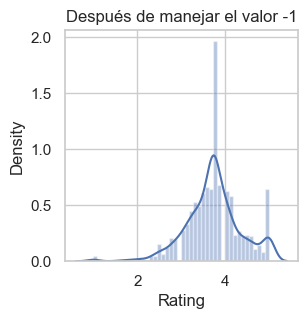

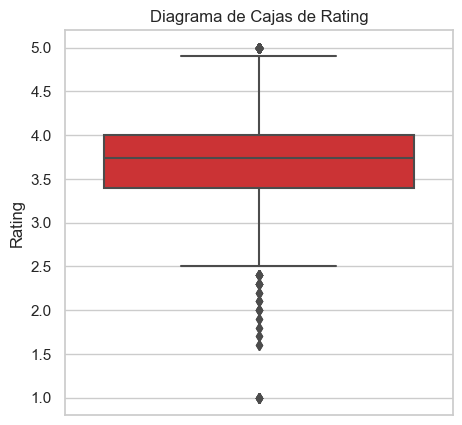

In [138]:
plt.figure(figsize=(3,3))
g = sns.distplot(a=df['Rating'])
p = plt.title('Antes de manejar el valor -1')

#Diagrama de cajas
plt.figure(figsize=(5,5))
sns.boxplot(y='Rating', data=df, orient='H', palette='Set1')
p = plt.title('Diagrama de Cajas de Rating')
p = plt.ylabel('Rating')

# Manejo de valores -1 en la columna Rating 
#En calificción se sugiere trabajar con media 
#-sumando todos los valores y dividiendo 

#reemplazo con valores faltantes
df['Rating'] = df['Rating'].apply(lambda x: np.NaN if x==-1 else x) 
#uso fillna para rellenar los valores faltantes con la media de Rating
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

plt.figure(figsize=(3,3))
g = sns.distplot(a=df['Rating'])
p = plt.title('Después de manejar el valor -1')

plt.figure(figsize=(5,5))
sns.boxplot(y='Rating', data=df, orient='H', palette='Set1')
p = plt.title('Diagrama de Cajas de Rating')
p = plt.ylabel('Rating')

C:\Users\osdca\AppData\Local\Temp\ipykernel_24344\2457521577.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=df['Founded'])
C:\Users\osdca\AppData\Local\Temp\ipykernel_24344\2457521577.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=df['Founded'])


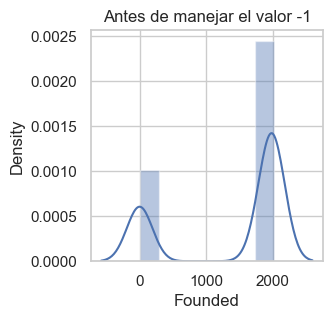

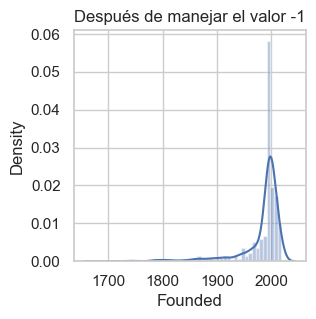

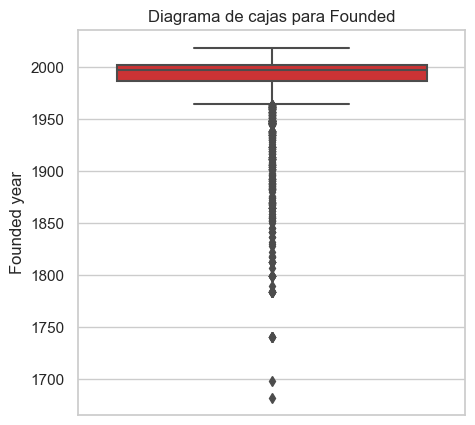

In [139]:
plt.figure(figsize=(3,3))
g = sns.distplot(a=df['Founded'])
p = plt.title('Antes de manejar el valor -1')


# Manejo de valores -1 en la columna Founded
#En eL año que se fundó la empresa se sugiere trabajar con mediana
#-poniendo los números en orden ascendente y localizando valor central
df['Founded'] = df['Founded'].apply(lambda x: np.NaN if x==-1 else x)
#uso fillna para rellenar los valores faltantes con la media de Rating
df['Founded'] = df['Founded'].fillna(int(df['Founded'].median()))
#se asegura que el año sea número entero
df['Founded'] = df['Founded'].astype('int')


plt.figure(figsize=(3,3))
g = sns.distplot(a=df['Founded'])
p = plt.title('Después de manejar el valor -1')

plt.figure(figsize=(5,5))
sns.boxplot(y='Founded', data=df, orient='v', palette='Set1')
p = plt.title('Diagrama de cajas para Founded')
p = plt.ylabel('Founded year')


En este caso, se está contando la cantidad de trabajadores para título de trabajo en la columna "Job Title" y se están seleccionando los 20 títulos más comunes.
Este código es útil para obtener una idea de cuáles son los títulos de trabajo más comunes en el dataframe. 




In [140]:
#Lipiar Columna "Job Title"
df['Job Title'].value_counts().nlargest(20)


Data Analyst               405
Senior Data Analyst         90
Junior Data Analyst         30
Business Data Analyst       28
Sr. Data Analyst            21
Data Analyst Junior         17
Data Analyst II             17
Data Quality Analyst        17
Data Governance Analyst     16
Lead Data Analyst           15
Data Reporting Analyst      13
Financial Data Analyst      12
Data Analyst I              11
Data Analyst III            11
Marketing Data Analyst       9
Sr Data Analyst              9
Data Management Analyst      8
Data Warehouse Analyst       8
Data Science Analyst         7
Technical Data Analyst       7
Name: Job Title, dtype: int64

In [141]:
#Simplifica los títulos de trabajo y los agrupa en categorías más generales
def title_cleaner(title):
    if 'data scientist' in title.lower() or 'scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'other'

df['job_title'] = df['Job Title'].apply(title_cleaner)
df['job_title'].value_counts()

data analyst      1659
other              550
data scientist      20
data engineer       17
manager              6
director             1
Name: job_title, dtype: int64

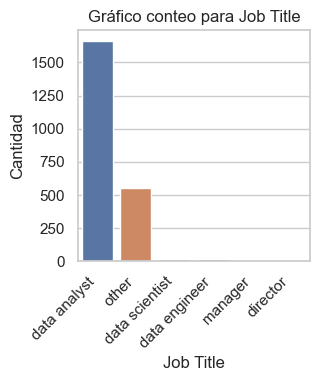

In [142]:
plt.figure(figsize=(3,3))
g = sns.countplot(x='job_title', data=df, order = df['job_title'].value_counts().index)
p = plt.title('Gráfico conteo para Job Title')
p = plt.xlabel('Job Title')
p = plt.ylabel('Cantidad')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [143]:
#Simplifica los títulos de trabajo y los agrupa en categorías más generales
def title_seniority(title):
    if 'sr.' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'sr'
    elif 'junior' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'other'

df['job_seniority'] = df['Job Title'].apply(title_seniority)
df['job_seniority'].value_counts()

other    1741
sr        443
jr         69
Name: job_seniority, dtype: int64

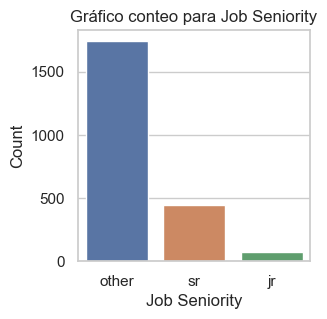

In [144]:
plt.figure(figsize=(3,3))
g = sns.countplot(x='job_seniority', data=df, order = df['job_seniority'].value_counts().index)
p = plt.title('Gráfico conteo para Job Seniority')
p = plt.xlabel('Job Seniority')
p = plt.ylabel('Count')

Elimina el texto adicional de la columna "Salary Estimate" y deja solo el rango de salarios.

Elimina la columna "Job Title".

Luego, utiliza la función apply para aplicar una función anónima a cada elemento de la columna "Salary Estimate" y crear una nueva serie llamada "salary". 

La función anónima utiliza la función split para dividir cada elemento en la serie en una lista de cadenas de texto utilizando "( " como separador. Luego, se selecciona el primer elemento de la lista con el índice [0] y se devuelve. Finalmente, se cuenta la cantidad de cada valor único en la serie "salary" con la función value_counts y se muestra en pantalla.

In [145]:
# Eliminación de la columna Job Title

#Limpia Columna 'Salary Estimate'
df.drop(labels=['Job Title'], axis=1, inplace=True) 
salary = df['Salary Estimate'].apply(lambda x: x.split("(")[0])
salary.value_counts()

$42K-$76K     57
$41K-$78K     57
$50K-$86K     41
$35K-$67K     33
$43K-$76K     31
              ..
$43K-$77K      3
$36K-$67K      3
$47K-$81K      3
$57K-$70K      2
-1             1
Name: Salary Estimate, Length: 90, dtype: int64

Se reemplaza los valores "-1" en la serie con valores NaN. 

La función replace elimina los caracteres "$" y "K" de cada elemento de la serie. 

La serie "salary" se modifica en cada paso y se asigna a sí misma.

In [146]:
salary = salary.apply(lambda x: np.NaN if x=='-1' else x)
# elimina los caracteres "$" y "K" de la columna 'Salary Estimate'
salary = salary.apply(lambda x: x if type(x)== type(3.5) else x.replace('$','').replace('K',''))
salary

0        37-66 
1        37-66 
2        37-66 
3        37-66 
4        37-66 
         ...   
2248    78-104 
2249    78-104 
2250    78-104 
2251    78-104 
2252    78-104 
Name: Salary Estimate, Length: 2253, dtype: object

In [147]:
# Encontrar cualquier inconsistencia en el salario.
print("Tamaño de Salary: ",len(salary.unique()))
salary.unique()[380:]

Tamaño de Salary:  90


array([], dtype=object)

C:\Users\osdca\AppData\Local\Temp\ipykernel_24344\3200041240.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=df['Salary'])


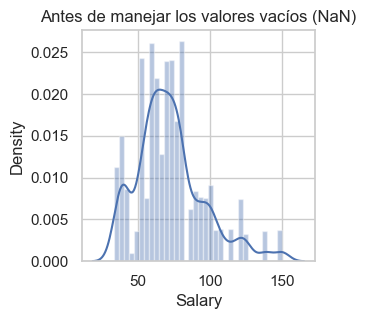

In [148]:
# Eliminación de la cadena "employer provided salary" del arreglo salary
salary = salary.apply(lambda x: x if type(x)==type(3.5) else x.lower().replace("employer provided salary:", ""))
salary.unique()[380:]

# Convertir salarios por hora a salarios por año
def hourly_to_yearly(minlimit, maxlimit):
    x = minlimit.strip()
    y = maxlimit.strip()
    x = int(int(minlimit)*45*52/1000)
    y = int(int(maxlimit)*45*52/1000)
    return '{}-{}'.format(x,y)

salary = salary.apply(lambda x: x if type(x)==type(3.5) else (hourly_to_yearly(x.lower().replace("per hour", "").split('-')[0], x.lower().replace("per hour", "").split('-')[1]) if "per hour" in x.lower() else x))
salary.unique()[380:]

# Creando una columna para el salario (promedio del rango)
df['Salary'] = salary.apply(lambda x:  x if type(x)==type(3.5) else (int(x.split("-")[0]) + int(x.split("-")[1].strip()))/2)

plt.figure(figsize=(3,3))
g = sns.distplot(a=df['Salary'])
p = plt.title('Antes de manejar los valores vacíos (NaN)')



C:\Users\osdca\AppData\Local\Temp\ipykernel_24344\731255056.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=df['Salary'])


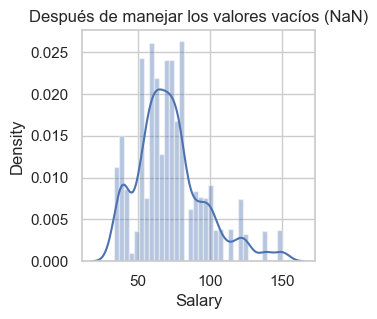

In [149]:
#Manejo de valores NaN en la columna Salary
df['Salary'] = df['Salary'].fillna(df['Salary'].median())

plt.figure(figsize=(3,3))
g = sns.distplot(a=df['Salary'])
p = plt.title('Después de manejar los valores vacíos (NaN)')

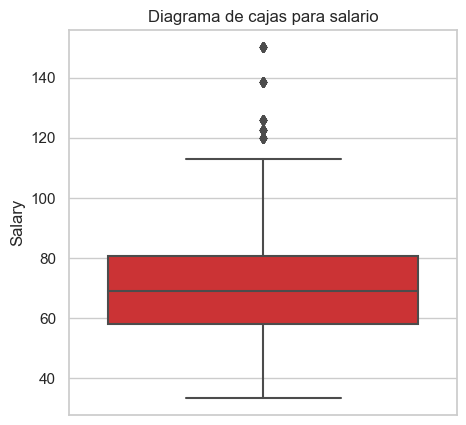

In [150]:
plt.figure(figsize=(5,5))
g = sns.boxplot(y='Salary', data=df, orient='v', palette='Set1')
p = plt.title('Diagrama de cajas para salario')
p = plt.ylabel('Salary')

PARA LA VARIABLE COMPANY NAME

) missing from current font.\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\events.py:89: UserWarning: Glyph 13 (
  func(*args, **kwargs)
) missing from current font.\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


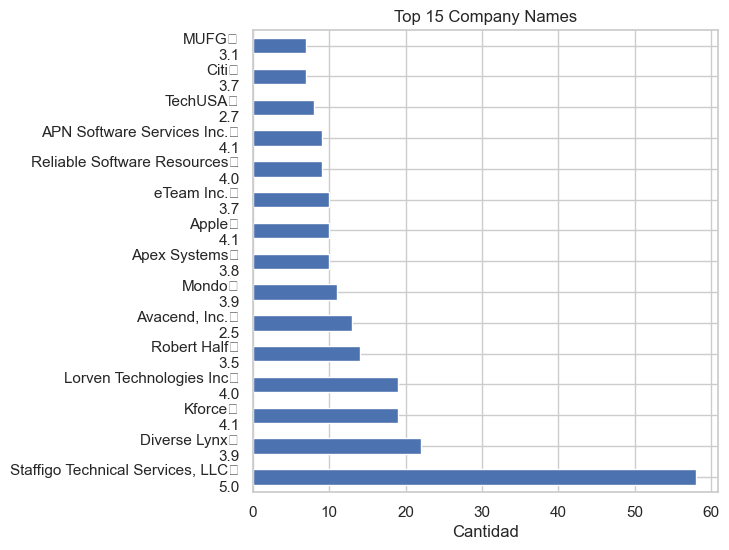

In [151]:
plt.figure(figsize=(6,6))
g = df["Company Name"].value_counts().nlargest(15).plot(kind='barh')
p = plt.title('Top 15 Company Names')
p = plt.xlabel('Cantidad')

In [152]:
# Crea columna 'job_state'
df['job_location'] = df['Location'].apply(lambda x: x if ',' not in x else x.split(',')[1].strip())
print('Número total de ubicaciones únicas: {}'.format(len(df['job_location'].unique())))

Número total de ubicaciones únicas: 20


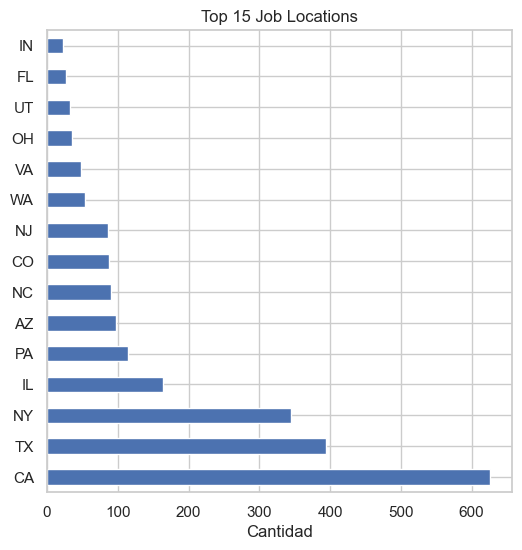

In [153]:
plt.figure(figsize=(6,6))
g = df["job_location"].value_counts().nlargest(15).plot(kind='barh')
p = plt.title('Top 15 Job Locations')
p = plt.xlabel('Cantidad')

LIMPIEZA DE:

-Size

-Type of Ownership

-Industry

-Sector

In [154]:
df['Size'].value_counts()

51 to 200 employees        421
10000+ employees           375
1001 to 5000 employees     348
1 to 50 employees          347
201 to 500 employees       249
501 to 1000 employees      211
-1                         163
5001 to 10000 employees     97
Unknown                     42
Name: Size, dtype: int64

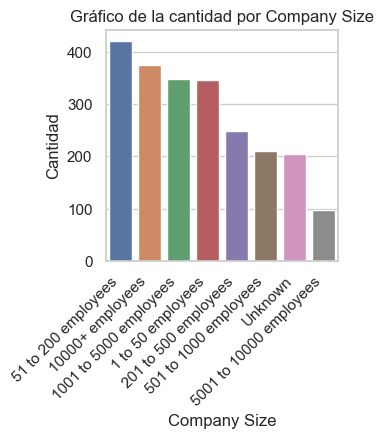

In [155]:
# Limpiando 'Size' 
def size_simplifier(text):
  if '-1' in text.lower():
    return 'Unknown'
  else:
    return text

df['Size'] = df['Size'].apply(size_simplifier)

#Diagrama de barras
plt.figure(figsize=(3,3))
g = sns.countplot(x='Size', data=df, order = df['Size'].value_counts().index)
p = plt.title('Gráfico de la cantidad por Company Size')
p = plt.xlabel('Company Size')
p = plt.ylabel('Cantidad')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [156]:
#Limpieza de la columna Tipo de propiedad (Type of Ownership)
df['Type of ownership'].value_counts()

Company - Private                 1273
Company - Public                   452
-1                                 163
Nonprofit Organization             124
Subsidiary or Business Segment      89
Government                          37
College / University                34
Hospital                            19
Unknown                             16
Other Organization                  13
Contract                            11
School / School District             9
Private Practice / Firm              9
Self-employed                        2
Franchise                            2
Name: Type of ownership, dtype: int64

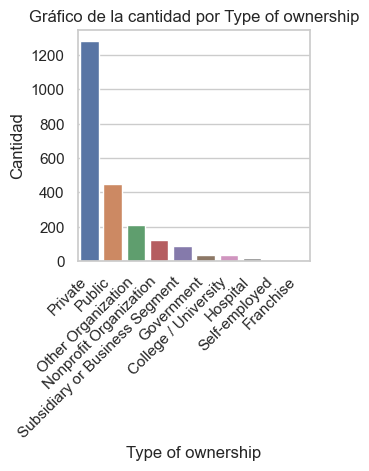

In [157]:
def ownership_simplifier(text):
    if 'private' in text.lower():
        return 'Private'
    elif 'public' in text.lower():
        return 'Public'
    elif ('-1' in text.lower()) or ('unknown' in text.lower()) or ('school / school district' in text.lower()) or ('private practice / firm' in text.lower()) or ('contract' in text.lower()) :
        return 'Other Organization'
    else:
        return text

df['Type of ownership'] = df['Type of ownership'].apply(ownership_simplifier)

#Diagrama de barras
plt.figure(figsize=(3,3))
g = sns.countplot(x='Type of ownership', data=df, order = df['Type of ownership'].value_counts().index)
p = plt.title('Gráfico de la cantidad por Type of ownership')
p = plt.xlabel('Type of ownership')
p = plt.ylabel('Cantidad')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [158]:
# Limpiando'Industry' 
df['Industry'].value_counts()

-1                                  353
IT Services                         325
Staffing & Outsourcing              323
Health Care Services & Hospitals    151
Computer Hardware & Software        111
                                   ... 
Express Delivery Services             1
Truck Rental & Leasing                1
Sporting Goods Stores                 1
Chemical Manufacturing                1
Hotels, Motels, & Resorts             1
Name: Industry, Length: 89, dtype: int64

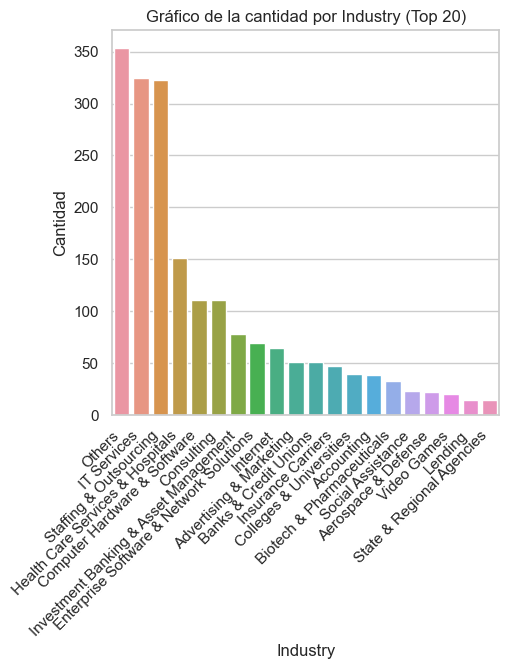

In [159]:
df['Industry'] = df['Industry'].apply(lambda x: 'Others' if x=='-1' else x)

plt.figure(figsize=(5,5))
g = sns.countplot(x='Industry', data=df, order = df['Industry'].value_counts()[:20].index)
p = plt.title('Gráfico de la cantidad por Industry (Top 20)')
p = plt.xlabel('Industry')
p = plt.ylabel('Cantidad')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [160]:
# Limpiando 'Sector' 
df['Sector'].value_counts()

Information Technology                570
Business Services                     524
-1                                    353
Finance                               169
Health Care                           151
Education                              52
Insurance                              51
Accounting & Legal                     43
Media                                  42
Manufacturing                          40
Retail                                 38
Government                             36
Biotech & Pharmaceuticals              33
Non-Profit                             26
Aerospace & Defense                    22
Transportation & Logistics             20
Construction, Repair & Maintenance     16
Consumer Services                      14
Oil, Gas, Energy & Utilities           13
Real Estate                            12
Telecommunications                     11
Restaurants, Bars & Food Services       8
Arts, Entertainment & Recreation        7
Mining & Metals                   

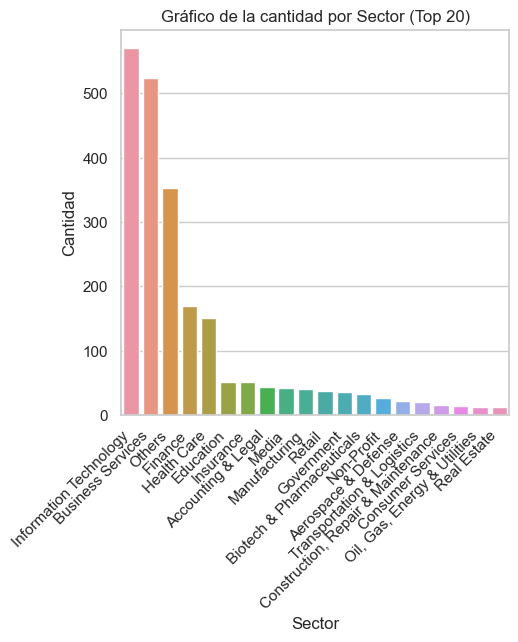

In [161]:
df['Sector'] = df['Sector'].apply(lambda x: 'Others' if x=='-1' else x)

plt.figure(figsize=(5,5))
g = sns.countplot(x='Sector', data=df, order = df['Sector'].value_counts()[:20].index)
p = plt.title('Gráfico de la cantidad por Sector (Top 20)')
p = plt.xlabel('Sector')
p = plt.ylabel('Cantidad')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [162]:
# Limpiando 'Revenue'-Ingreso
df['Revenue'].value_counts()

Unknown / Non-Applicable            615
$100 to $500 million (USD)          218
$50 to $100 million (USD)           199
$10+ billion (USD)                  189
-1                                  163
$10 to $25 million (USD)            132
$2 to $5 billion (USD)              129
$1 to $5 million (USD)              111
$25 to $50 million (USD)            110
Less than $1 million (USD)           93
$1 to $2 billion (USD)               87
$500 million to $1 billion (USD)     79
$5 to $10 million (USD)              72
$5 to $10 billion (USD)              56
Name: Revenue, dtype: int64

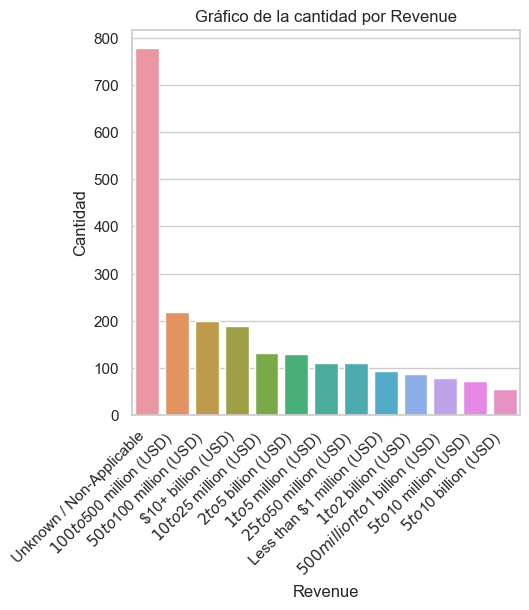

In [163]:
def revenue_simplifier(text):
    if '-1' in text.lower():
        return 'Unknown / Non-Applicable'
    else:
        return text
df['Revenue'] = df['Revenue'].apply(revenue_simplifier)

plt.figure(figsize=(5,5))
g = sns.countplot(x='Revenue', data=df, order = df['Revenue'].value_counts().index)
p = plt.title('Gráfico de la cantidad por Revenue')
p = plt.xlabel('Revenue')
p = plt.ylabel('Cantidad')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [164]:
#Limpiando 'Competitors'
df['Competitors'].value_counts()

-1                                                                 1732
Robert Half, Insight Global                                          14
Adecco, Manpower                                                     14
Artech Information Systems, Mindlance, Tech Mahindra                 10
Google, Microsoft, Samsung Electronics                               10
                                                                   ... 
Carr Riggs & Ingram, Cherry Bekaert, LBMC                             1
Transnational Foods, One Source Distributors                          1
GE                                                                    1
Fiserv, First Data, Jack Henry & Associates                           1
Centura Health, HealthONE, Denver Health and Hospital Authority       1
Name: Competitors, Length: 291, dtype: int64

In [165]:
#Cuenta los competidores separados por coma y la cantidad de competidores los pone si x distinto de -1 
df['Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

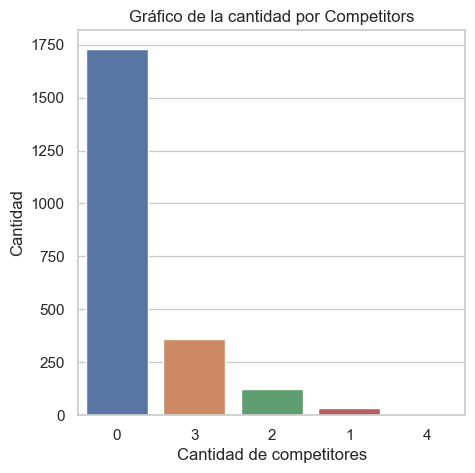

In [166]:
from builtins import bool
plt.figure(figsize=(5,5))
g = sns.countplot(x='Competitors', data=df, order = df['Competitors'].value_counts().index)
p = plt.title('Gráfico de la cantidad por Competitors')
p = plt.xlabel("Cantidad de competitores")
p = plt.ylabel('Cantidad')# Encontrar y trazar la correlación entre características numéricas

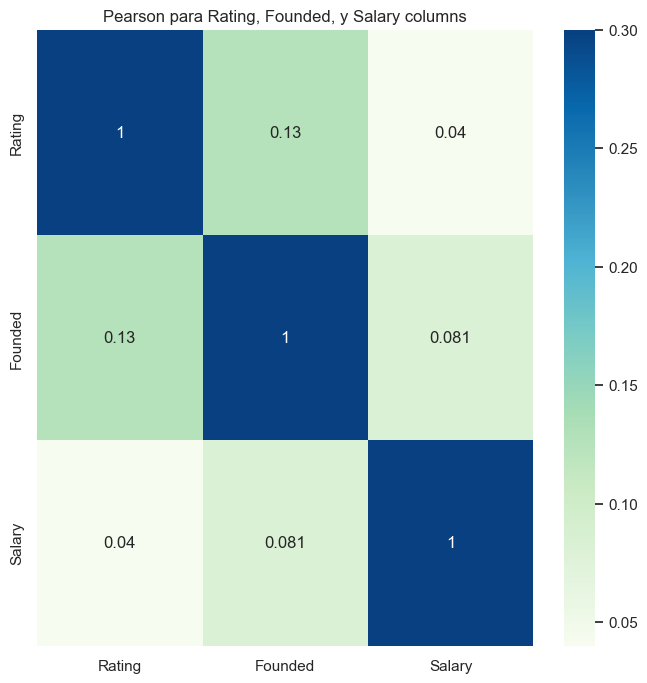

In [167]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(8,8))
corr = df[['Rating','Founded','Salary']].corr()

g = sns.heatmap(corr, vmax=0.3,annot=True, cmap='GnBu')

p = plt.title('Pearson para Rating, Founded, y Salary columns')

******************************************************************

LOCATION Y SKILLS

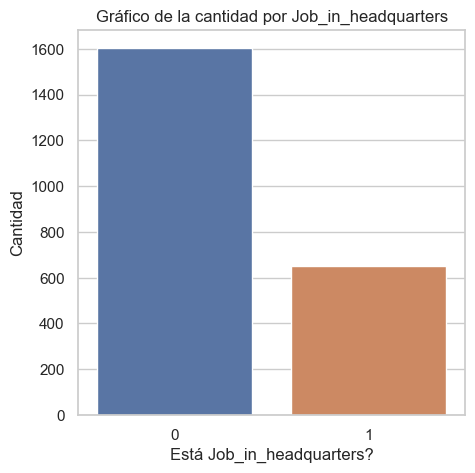

In [168]:
df['job_in_headquarters'] = df.apply(lambda x: 1 if x['Location'] == x['Headquarters'] else 0, axis=1) 
# Existen más location=headquarters
plt.figure(figsize=(5,5))
g = sns.countplot(x='job_in_headquarters', data=df)
p = plt.title('Gráfico de la cantidad por Job_in_headquarters')
p = plt.xlabel("Está Job_in_headquarters?")
p = plt.ylabel('Cantidad')

In [169]:
df

,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,job_title,job_seniority,Salary,job_location,job_in_headquarters
0,$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.200000,Vera Institute of Justice\r\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),0,True,data analyst,other,51.5,NY,1
1,$37K-$66K (Glassdoor est.),Overview\r\n\r\nProvides analytical and techni...,3.800000,Visiting Nurse Service of New York\r\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,-1,data analyst,other,51.5,NY,1
2,$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.400000,Squarespace\r\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Private,Internet,Information Technology,Unknown / Non-Applicable,1,-1,data analyst,sr,51.5,NY,1
3,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\r\nRemote:Yes\r\n...,4.100000,Celerity\r\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),0,-1,data analyst,other,51.5,NY,0
4,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\r\n\r\nFanDuel Group is a ...,3.900000,FanDuel\r\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),1,True,data analyst,other,51.5,NY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.500000,"Avacend, Inc.\r\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,1997,Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,0,-1,other,other,91.0,CO,0
2249,$78K-$104K (Glassdoor est.),Position:\r\nSenior Data Analyst (Corporate Au...,2.900000,Arrow Electronics\r\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935,Public,Wholesale,Business Services,$10+ billion (USD),3,-1,data analyst,sr,91.0,CO,1
2250,$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",3.731903,Spiceorb,"Denver, CO",-1,Unknown,1997,Other Organization,Others,Others,Unknown / Non-Applicable,0,-1,other,other,91.0,CO,0
2251,$78K-$104K (Glassdoor est.),Summary\r\n\r\nResponsible for working cross-f...,3.100000,Contingent Network Services\r\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984,Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),0,-1,data analyst,other,91.0,CO,0


In [170]:
df.drop(labels=['Location'], axis=1, inplace=True)

Generación de columnas con SKILLS

In [171]:
#Crear columnas de trabajos que incluyan python, excel, sql, tableau'
df['python_job'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df['excel_job'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
df['sql_job'] = df['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
df['tableau_job'] = df['Job Description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)

Gráficas de la frecuencia de petición de habilidades

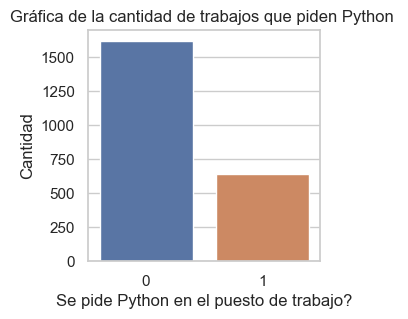

In [172]:
#0 es no y 1 es si
plt.figure(figsize=(3,3))
g = sns.countplot(x='python_job', data=df)
p = plt.title('Gráfica de la cantidad de trabajos que piden Python ')
p = plt.xlabel("Se pide Python en el puesto de trabajo?")
p = plt.ylabel('Cantidad')

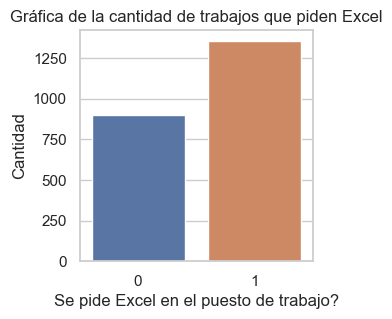

In [173]:
plt.figure(figsize=(3,3))
g = sns.countplot(x='excel_job', data=df)
p = plt.title('Gráfica de la cantidad de trabajos que piden Excel')
p = plt.xlabel("Se pide Excel en el puesto de trabajo?")
p = plt.ylabel('Cantidad')

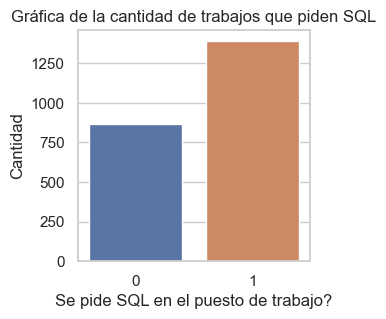

In [174]:
plt.figure(figsize=(3,3))
g = sns.countplot(x='sql_job', data=df)
p = plt.title('Gráfica de la cantidad de trabajos que piden SQL')
p = plt.xlabel("Se pide SQL en el puesto de trabajo?")
p = plt.ylabel('Cantidad')

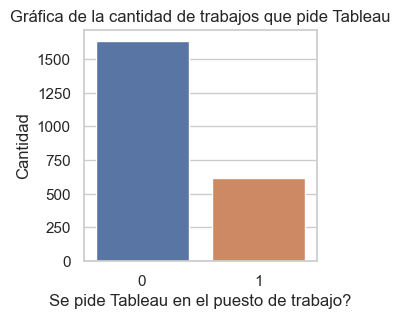

In [175]:
plt.figure(figsize=(3,3))
g = sns.countplot(x='tableau_job', data=df)
p = plt.title('Gráfica de la cantidad de trabajos que pide Tableau')
p = plt.xlabel("Se pide Tableau en el puesto de trabajo?")
p = plt.ylabel('Cantidad')

In [176]:
df.drop(labels=['Job Description'], axis=1, inplace=True)

In [177]:
# Recortar la columna 'Sector'

# Tomando el top 9 Sector y reemplazando el resto por 'Otros'
sector_list = list(df['Sector'].value_counts()[:10].index)

def sector_simplifier(text):
  if text not in sector_list:
    return 'Others'
  else:
    return text

df['Sector'] = df['Sector'].apply(sector_simplifier)

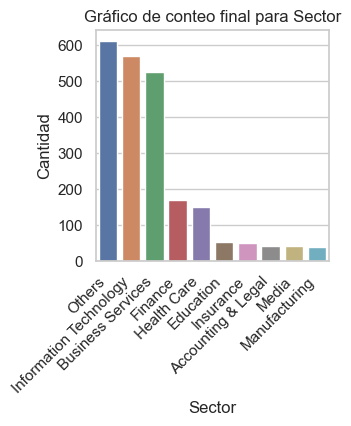

In [178]:
plt.figure(figsize=(3,3))
g = sns.countplot(x='Sector', data=df, order = df['Sector'].value_counts().index)
p = plt.title('Gráfico de conteo final para Sector')
p = plt.xlabel('Sector')
p = plt.ylabel('Cantidad')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

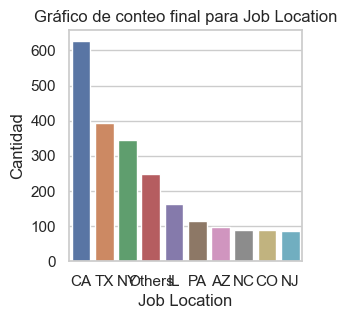

In [179]:
# Recortar la columna 'job_location'

# Tomando los 9 estados principales y reemplazando otros por 'Otros'
job_location_list = list(df['job_location'].value_counts()[:9].index)

def job_location_simplifier(text):
  if text not in job_location_list:
    return 'Others'
  else:
    return text

df['job_location'] = df['job_location'].apply(job_location_simplifier)
plt.figure(figsize=(3,3))
g = sns.countplot(x='job_location', data=df, order = df['job_location'].value_counts().index)
p = plt.title('Gráfico de conteo final para Job Location')
p = plt.xlabel('Job Location')
p = plt.ylabel('Cantidad')

In [180]:
df.drop(labels=['Salary Estimate', 'Company Name', 'Headquarters', 'Industry', 'job_location'], axis=1, inplace=True)

In [181]:
# Renombrar columnas
df.rename(columns={'Rating':'company_calificacion', 'Size':'company_size', 'Founded':'company_fundacion', 'Type of ownership':'tipo_de_propiedad',
                   'Sector':'sector', 'Revenue':'ingresos', 'Competitors':'competidores', 'Salary': 'salario'}, inplace=True)
# Asignación de rangos a 'company_size' column
size_map = {'Unknown': 0, '1 to 50 employees': 1, '51 to 200 employees': 2, '201 to 500 employees': 3,
            '501 to 1000 employees': 4, '1001 to 5000 employees': 5, '5001 to 10000 employees': 6, '10000+ employees': 7}

df['company_size'] = df['company_size'].map(size_map)

In [182]:
# Asignación de rangos a la columna 'ingresos'
revenue_map = {'Unknown / Non-Applicable': 0, 'Less than $1 million (USD)': 1, '$1 to $5 million (USD)': 2, '$5 to $10 million (USD)': 3,
            '$10 to $25 million (USD)': 4, '$25 to $50 million (USD)': 5, '$50 to $100 million (USD)': 6, '$100 to $500 million (USD)': 7,
            '$500 million to $1 billion (USD)': 8, '$1 to $2 billion (USD)': 9, '$2 to $5 billion (USD)':10, '$5 to $10 billion (USD)':11,
            '$10+ billion (USD)':12}

df['ingresos'] = df['ingresos'].map(revenue_map)

In [183]:
# Asignación de rangos a la columna 'job_seniority'
job_seniority_map = {'other': 0, 'jr': 1, 'sr': 2}

df['job_seniority'] = df['job_seniority'].map(job_seniority_map)

In [184]:
df.drop(labels=['company_fundacion', 'Easy Apply'], axis=1, inplace=True)

In [185]:
df

,company_calificacion,company_size,tipo_de_propiedad,sector,ingresos,competidores,job_title,job_seniority,salario,job_in_headquarters,python_job,excel_job,sql_job,tableau_job
0,3.200000,3,Nonprofit Organization,Others,7,0,data analyst,0,51.5,1,1,0,1,0
1,3.800000,7,Nonprofit Organization,Health Care,10,0,data analyst,0,51.5,1,0,1,1,0
2,3.400000,5,Private,Information Technology,0,1,data analyst,2,51.5,1,1,1,1,1
3,4.100000,3,Subsidiary or Business Segment,Information Technology,6,0,data analyst,0,51.5,0,0,0,1,1
4,3.900000,4,Private,Others,7,1,data analyst,0,51.5,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,2.500000,2,Private,Business Services,0,0,other,0,91.0,0,0,0,0,0
2249,2.900000,7,Public,Business Services,12,3,data analyst,2,91.0,1,0,0,1,1
2250,3.731903,0,Other Organization,Others,0,0,other,0,91.0,0,0,1,1,0
2251,3.100000,3,Private,Information Technology,5,0,data analyst,0,91.0,0,1,0,1,0


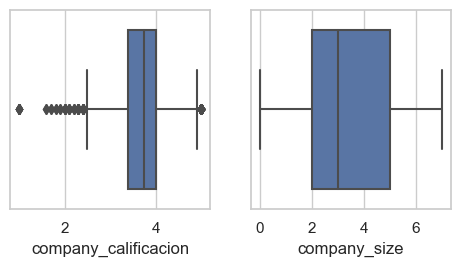

In [186]:
plt.figure(figsize=(15,15))
c = df.columns[:-12]
for i in enumerate(c):
  plt.subplot(5,5,i[0]+1)
  sns.boxplot(x=i[1], data=df)

In [187]:
for i in c:
  q1 = df[i].quantile(0.1) #valor
  q4 = df[i].quantile(0.90) #valor
  df[i][df[i]<=q1] = q1
  df[i][df[i]>=q4] = q4


C:\Users\osdca\AppData\Local\Temp\ipykernel_24344\4070777419.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]<=q1] = q1
C:\Users\osdca\AppData\Local\Temp\ipykernel_24344\4070777419.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]>=q4] = q4


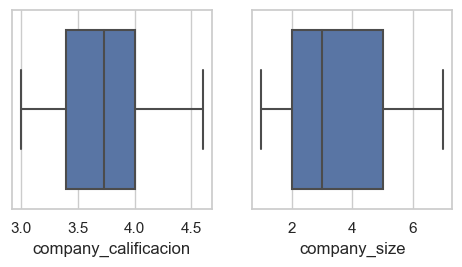

In [188]:
plt.figure(figsize=(15,15))
c = df.columns[:-12]
for i in enumerate(c):
  plt.subplot(5,5,i[0]+1)
  sns.boxplot(x=i[1], data=df)

LABEL ENCODER

TIPO DE PROPIEDAD

In [189]:
df['tipo_de_propiedad'].value_counts()

Private                           1282
Public                             452
Other Organization                 212
Nonprofit Organization             124
Subsidiary or Business Segment      89
Government                          37
College / University                34
Hospital                            19
Self-employed                        2
Franchise                            2
Name: tipo_de_propiedad, dtype: int64

In [190]:
from sklearn.preprocessing import LabelEncoder

In [191]:
le = LabelEncoder()

In [192]:
df['tipo_de_propiedad']=le.fit_transform(df['tipo_de_propiedad'])
df['sector']=le.fit_transform(df['sector'])
df['job_title']=le.fit_transform(df['job_title'])

In [193]:
df

,company_calificacion,company_size,tipo_de_propiedad,sector,ingresos,competidores,job_title,job_seniority,salario,job_in_headquarters,python_job,excel_job,sql_job,tableau_job
0,3.200000,3,4,9,7,0,0,0,51.5,1,1,0,1,0
1,3.800000,7,4,4,10,0,0,0,51.5,1,0,1,1,0
2,3.400000,5,6,5,0,1,0,2,51.5,1,1,1,1,1
3,4.100000,3,9,5,6,0,0,0,51.5,0,0,0,1,1
4,3.900000,4,6,9,7,1,0,0,51.5,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,3.000000,2,6,1,0,0,5,0,91.0,0,0,0,0,0
2249,3.000000,7,7,1,12,3,0,2,91.0,1,0,0,1,1
2250,3.731903,1,5,9,0,0,5,0,91.0,0,0,1,1,0
2251,3.100000,3,6,5,5,0,0,0,91.0,0,1,0,1,0


In [194]:
X = df.drop(['salario'],axis=1)
y = df['salario']

<AxesSubplot: title={'center': 'Pearson'}>

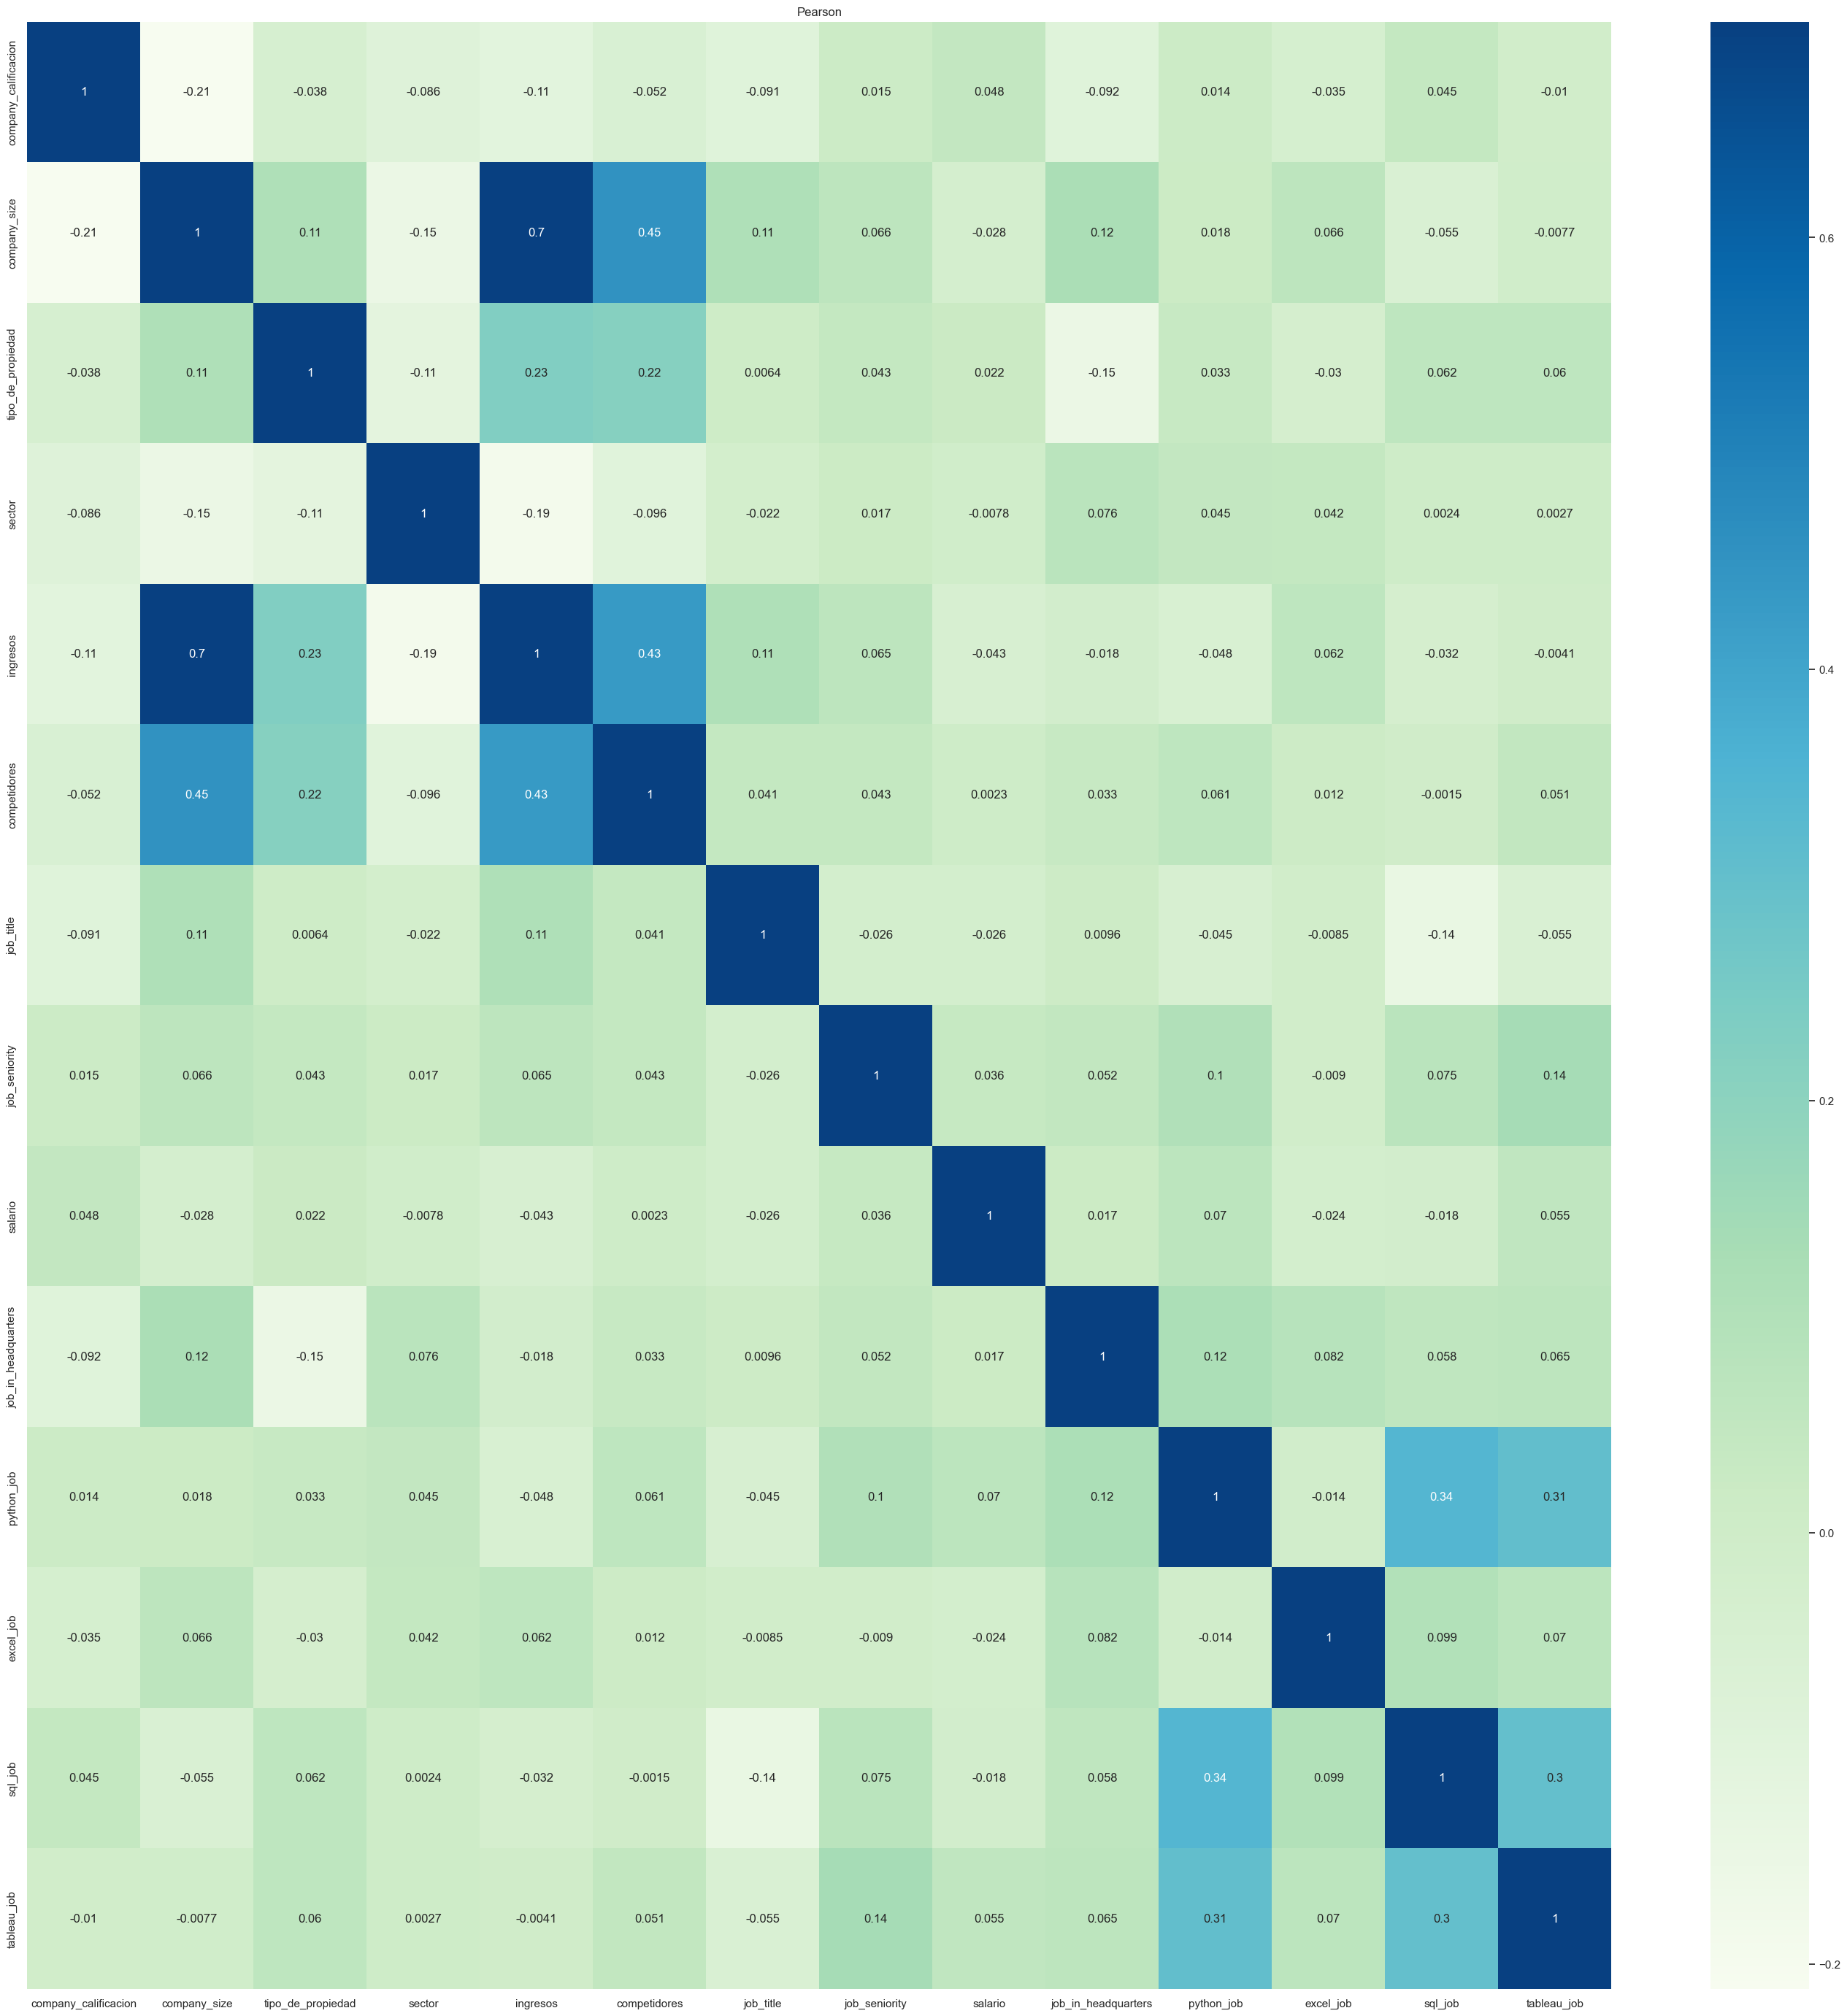

In [195]:
sns.set(style='whitegrid',font_scale=1)
plt.figure(figsize=(35,35))
plt.title('Pearson')
sns.heatmap(df.corr(),vmax=0.7,annot=True,cmap='GnBu')

In [196]:
from sklearn.preprocessing import StandardScaler
X_prev = X.copy()

sc_rating = StandardScaler()
X['company_calificacion'] = sc_rating.fit_transform(X[['company_calificacion']])

In [197]:
import pickle

In [198]:
with open("sc_rating.pkl", "wb") as file:
    pickle.dump(sc_rating, file)

C:\Users\osdca\AppData\Local\Temp\ipykernel_24344\2732208293.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=X_prev['company_calificacion'])
C:\Users\osdca\AppData\Local\Temp\ipykernel_24344\2732208293.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=X['company_calificacion']

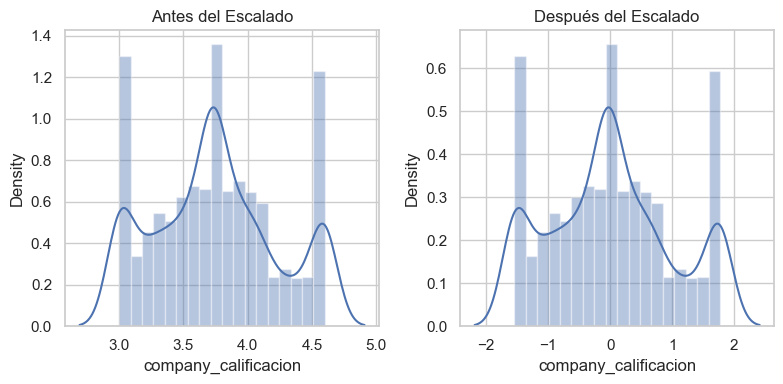

In [199]:
# Trazado de company_calificacion antes y después del escalado de características
plt.figure(figsize=(8, 4))

# 1-row, 2-column, primer subplot
plt.subplot(1, 2, 1)
g = sns.distplot(a=X_prev['company_calificacion'])
p = plt.title('Antes del Escalado')

# 1-row, 2-column, segunda subplot
plt.subplot(1, 2, 2)
g = sns.distplot(a=X['company_calificacion'])
p = plt.title('Después del Escalado')

plt.tight_layout()
plt.show()

---------------------------------------MODELO NEW--------------------------------

array([[<AxesSubplot: title={'center': 'company_calificacion'}>,
        <AxesSubplot: title={'center': 'company_size'}>,
        <AxesSubplot: title={'center': 'tipo_de_propiedad'}>,
        <AxesSubplot: title={'center': 'sector'}>],
       [<AxesSubplot: title={'center': 'ingresos'}>,
        <AxesSubplot: title={'center': 'competidores'}>,
        <AxesSubplot: title={'center': 'job_title'}>,
        <AxesSubplot: title={'center': 'job_seniority'}>],
       [<AxesSubplot: title={'center': 'job_in_headquarters'}>,
        <AxesSubplot: title={'center': 'python_job'}>,
        <AxesSubplot: title={'center': 'excel_job'}>,
        <AxesSubplot: title={'center': 'sql_job'}>],
       [<AxesSubplot: title={'center': 'tableau_job'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

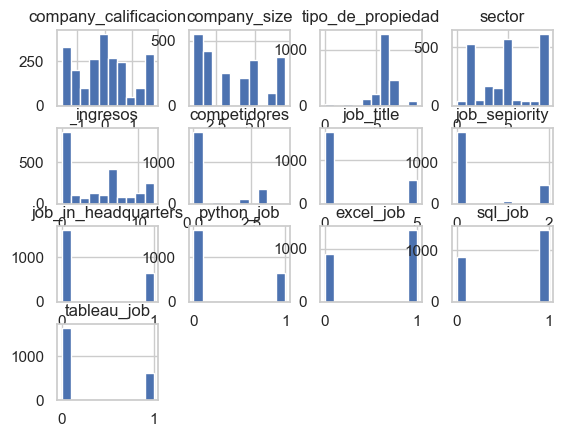

In [200]:
X.hist()

NRMSE: #error cuadrático medio raíz normalizado se calcula dividiendo el MSE con la varianza y se toma su raiz cuadrada

Trata de minimizar la suma de los cuadrados de las diferencias entre los valores predecidos y los valores reales.

In [201]:
pca = PCA(n_components=7)
pca.fit(X)
X_pca = pca.transform(X)

In [202]:
from sklearn.model_selection import cross_val_score
# Ajuste de regresión lineal múltiple al conjunto de entrenamiento
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
cvlr = cross_val_score(lr, X_pca, y, cv=10, scoring='neg_root_mean_squared_error')#error cuadrático medio raíz normalizado
print('--- Promedio del NRMSE: {} ---'.format(round(cvlr.mean(), 3)))
print('Desviación estandar: {}'.format(round(cvlr.std(), 3)))

--- Promedio del NRMSE: -22.923 ---
Desviación estandar: 7.675



Técnica de regularización que se utiliza para seleccionar características y prevenir el sobreajuste en modelos de regresión lineal. 



In [203]:
# Ajuste de la regresión de Lasso al conjunto de entrenamiento
from sklearn.linear_model import Lasso
lasso = Lasso()
cvlasso = cross_val_score(lasso, X_pca, y, cv=10, scoring='neg_root_mean_squared_error') #error cuadrático medio raíz normalizado
print('--- Promedio del NRMSE: {} ---'.format(round(cvlasso.mean(), 3)))
print('Desviación estandar: {}'.format(round(cvlasso.std(), 3)))

--- Promedio del NRMSE: -22.812 ---
Desviación estandar: 7.776


# Sección nueva

Algoritmo de aprendizaje automático de conjunto que combina varios árboles de decisión para hacer predicciones.

In [204]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
cvrf = cross_val_score(rf, X_pca, y, cv=10, scoring='neg_root_mean_squared_error')#error cuadrático medio raíz normalizado
print('---  Promedio del NRMSE: {} ---'.format(round(cvrf.mean(), 3)))
print('Desviación estandar: {}'.format(round(cvrf.std(), 3)))

---  Promedio del NRMSE: -25.179 ---
Desviación estandar: 6.513


Algoritmo de aprendizaje automático de conjunto que combina varios árboles de decisión de forma secuencial.

In [205]:
# Ajustar el aumento de gradiente al conjunto de entrenamiento
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
cvgb = cross_val_score(gb, X_pca, y, cv=10, scoring='neg_root_mean_squared_error')#error cuadrático medio raíz normalizado
print('--- Promedio del NRMSE: {} ---'.format(round(cvgb.mean(), 3)))
print('Desviación estandar: {}'.format(round(cvgb.std(), 3)))

--- Promedio del NRMSE: -23.327 ---
Desviación estandar: 7.311


Combina varios modelos de regresión en un solo modelo final. 

In [206]:
# Ajuste de Random Forest y Gradient Boost a Voting Regressor
from sklearn.ensemble import VotingRegressor
vr = VotingRegressor([('random_forest', rf), ('gradient_boosting', gb)], weights=[2,1])
cvvr = cross_val_score(vr, X_pca, y, cv=10, scoring='neg_root_mean_squared_error')#error cuadrático medio raíz normalizado
print('---  Promedio del NRMSE: {} ---'.format(round(cvvr.mean(), 3)))
print('Desviación estandar: {}'.format(round(cvvr.std(), 3)))

---  Promedio del NRMSE: -24.26 ---
Desviación estandar: 6.891


In [207]:
from sklearn.model_selection import train_test_split

In [242]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X)
x=scaler.transform(X)

In [243]:
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=134,test_size=0.3)

In [209]:
rf = RandomForestRegressor(random_state=42)

In [210]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [211]:
y_pred=rf.predict(X_test)

In [212]:
from sklearn.metrics import mean_squared_error
from math import sqrt
nrmse = np.sqrt(mean_squared_error(y_test, y_pred)) / (y_test.max() - y_test.min())

# Imprimir el valor del NRMSE
print("NRMSE: ", nrmse)

NRMSE:  0.2131120311706633


In [244]:
from keras.models import Sequential
from keras.layers import Dense
ann = Sequential()
ann.add(Dense(7, activation='relu'))
ann.add(Dense(3, activation='relu')) 
ann.add(Dense(1)) 
ann.compile(optimizer='adam', loss='mse')
ann.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=23,epochs=100,verbose=1)

Epoch 1/100
69/69 [==============================] - 1s 5ms/step - loss: 5767.0093 - val_loss: 5808.7271
Epoch 2/100
69/69 [==============================] - 0s 3ms/step - loss: 5708.3384 - val_loss: 5747.2407
Epoch 3/100
69/69 [==============================] - 0s 3ms/step - loss: 5597.6470 - val_loss: 5564.1582
Epoch 4/100
69/69 [==============================] - 0s 4ms/step - loss: 5314.6631 - val_loss: 5158.9585
Epoch 5/100
69/69 [==============================] - 0s 4ms/step - loss: 4770.9316 - val_loss: 4480.1357
Epoch 6/100
69/69 [==============================] - 0s 3ms/step - loss: 3978.2134 - val_loss: 3595.9661
Epoch 7/100
69/69 [==============================] - 1s 9ms/step - loss: 3047.3589 - val_loss: 2650.3884
Epoch 8/100
69/69 [==============================] - 1s 9ms/step - loss: 2136.4761 - val_loss: 1784.6742
Epoch 9/100
69/69 [==============================] - 1s 8ms/step - loss: 1388.5527 - val_loss: 1193.7734
Epoch 10/100
69/69 [==============================] - 1

In [230]:
y_predict =ann.predict(X_test)
y_predict

22/22 [==============================] - 0s 4ms/step


array([[ 60.119694],
       [ 79.78009 ],
       [ 79.84728 ],
       [ 71.84875 ],
       [ 63.644524],
       [ 79.71065 ],
       [ 73.17385 ],
       [ 65.623085],
       [ 73.62203 ],
       [ 59.342014],
       [ 65.854416],
       [ 77.98852 ],
       [ 88.202095],
       [ 73.52819 ],
       [ 63.113644],
       [ 71.60819 ],
       [ 68.64232 ],
       [ 79.01868 ],
       [ 74.61634 ],
       [ 64.7984  ],
       [ 62.52468 ],
       [ 63.81691 ],
       [ 62.60714 ],
       [ 65.34483 ],
       [ 83.78073 ],
       [ 67.49308 ],
       [ 40.414177],
       [ 71.04378 ],
       [ 58.474537],
       [ 68.057335],
       [ 76.0075  ],
       [ 86.62123 ],
       [ 65.37065 ],
       [ 66.75503 ],
       [ 69.79472 ],
       [ 77.85227 ],
       [ 72.19388 ],
       [ 67.65564 ],
       [ 72.94787 ],
       [ 66.319336],
       [ 62.805317],
       [ 63.143364],
       [ 73.350876],
       [ 75.978645],
       [ 97.79915 ],
       [ 66.02281 ],
       [ 91.87317 ],
       [ 68.2

VOTTING REGRESSOR
El Voting Regressor es un modelo de ensamble que combina las predicciones de varios modelos de regresión para mejorar la precisión de las predicciones.

In [245]:
vr = VotingRegressor([('random_forest', rf), ('gradient_boosting', gb)], weights=[2,1])
vr.fit(X_train, y_train)


VotingRegressor(estimators=[('random_forest',
                             RandomForestRegressor(random_state=42)),
                            ('gradient_boosting', GradientBoostingRegressor())],
                weights=[2, 1])

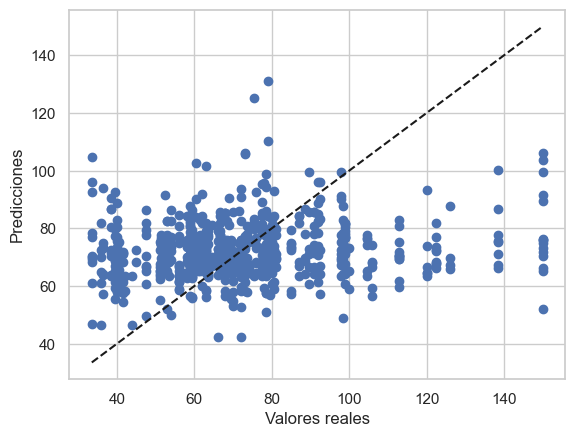

Error cuadrático medio de random forest: 616.4073200089526


In [246]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Crea una gráfica de dispersión de las predicciones vs los valores reales
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.show()

mse = mean_squared_error(y_test, y_predict)
print("Error cuadrático medio de random forest:", mse)

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

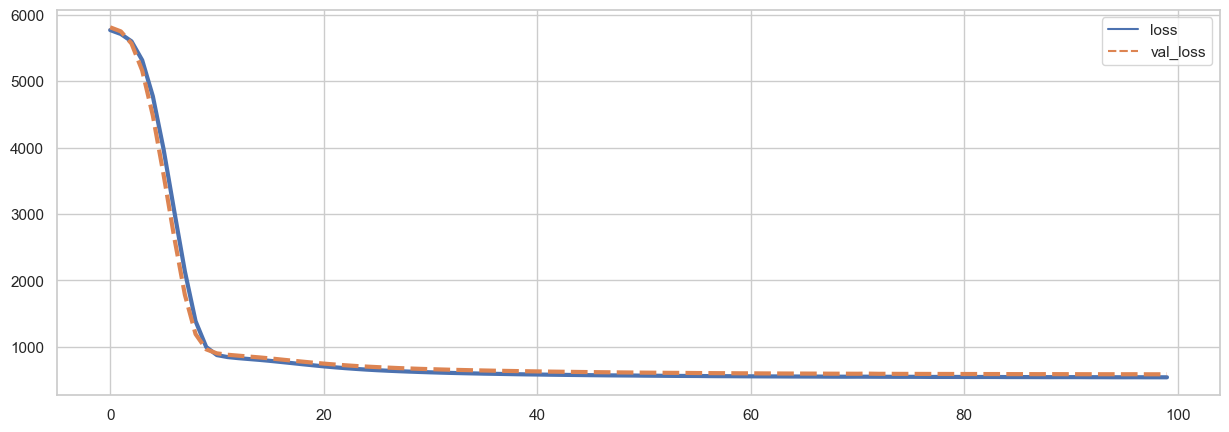

In [247]:
loss=pd.DataFrame(ann.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss,lw=3)
sns.despine

Dar formato 

In [262]:
def predict_salary(rating, sector, ownership, job_title, job_in_headquarters, job_seniority, job_skills):
#Limpieza de los datos que se ingresan para predecir
  prediction_input = list()

  prediction_input.append(sc_rating.transform(np.array(rating).reshape(1, -1)))

  sector_columns = ['sector_Health Care','sector_Business Services','sector_Information Technology']
  temp = list(map(int, np.zeros(shape=(1, len(sector_columns)))[0]))
  for index in range(0, len(sector_columns)):
    if sector_columns[index] == 'sector_' + sector:
      temp[index] = 1
      break
  prediction_input = prediction_input + temp


  if ownership == 'Private':
    prediction_input.append(1)
  else:
    prediction_input.append(0)
  

  job_title_columns = ['job_title_data scientist', 'job_title_data analyst']
  temp = list(map(int, np.zeros(shape=(1, len(job_title_columns)))[0]))
  for index in range(0, len(job_title_columns)):
    if job_title_columns[index] == 'job_title_' + job_title:
      temp[index] = 1
      break
  prediction_input = prediction_input + temp


  prediction_input.append(job_in_headquarters)


  job_seniority_map = {'other': 0, 'jr': 1, 'sr': 2}
  prediction_input.append(job_seniority_map[job_seniority])


  temp = list(map(int, np.zeros(shape=(1, 4))[0]))
  if 'excel' in job_skills:
    temp[0] = 1
  if 'python' in job_skills:
    temp[1] = 1
  if 'tableau' in job_skills:
    temp[2] = 1
  if 'sql' in job_skills:
    temp[3] = 1
  prediction_input = prediction_input + temp
  h3=np.array(prediction_input)
  prediction_input=scaler.transform(h3.reshape(1, -1))

  return ann.predict([prediction_input])[0]

In [264]:
def predict_salary1(rating, sector, ownership, job_title, job_in_headquarters, job_seniority, job_skills):
#Limpieza de los datos que se ingresan para predecir
  prediction_input = list()

  prediction_input.append(sc_rating.transform(np.array(rating).reshape(1, -1)))

  sector_columns = ['sector_Health Care','sector_Business Services','sector_Information Technology']
  temp = list(map(int, np.zeros(shape=(1, len(sector_columns)))[0]))
  for index in range(0, len(sector_columns)):
    if sector_columns[index] == 'sector_' + sector:
      temp[index] = 1
      break
  prediction_input = prediction_input + temp


  if ownership == 'Private':
    prediction_input.append(1)
  else:
    prediction_input.append(0)
  

  job_title_columns = ['job_title_data scientist', 'job_title_data analyst']
  temp = list(map(int, np.zeros(shape=(1, len(job_title_columns)))[0]))
  for index in range(0, len(job_title_columns)):
    if job_title_columns[index] == 'job_title_' + job_title:
      temp[index] = 1
      break
  prediction_input = prediction_input + temp


  prediction_input.append(job_in_headquarters)


  job_seniority_map = {'other': 0, 'jr': 1, 'sr': 2}
  prediction_input.append(job_seniority_map[job_seniority])


  temp = list(map(int, np.zeros(shape=(1, 4))[0]))
  if 'excel' in job_skills:
    temp[0] = 1
  if 'python' in job_skills:
    temp[1] = 1
  if 'tableau' in job_skills:
    temp[2] = 1
  if 'sql' in job_skills:
    temp[3] = 1
  prediction_input = prediction_input + temp
  

  return rf.predict([prediction_input])[0]

In [270]:
def predict_salary2(rating, sector, ownership, job_title, job_in_headquarters, job_seniority, job_skills):
#Limpieza de los datos que se ingresan para predecir
  prediction_input = list()

  prediction_input.append(sc_rating.transform(np.array(rating).reshape(1, -1)))

  sector_columns = ['sector_Health Care','sector_Business Services','sector_Information Technology']
  temp = list(map(int, np.zeros(shape=(1, len(sector_columns)))[0]))
  for index in range(0, len(sector_columns)):
    if sector_columns[index] == 'sector_' + sector:
      temp[index] = 1
      break
  prediction_input = prediction_input + temp


  if ownership == 'Private':
    prediction_input.append(1)
  else:
    prediction_input.append(0)
  

  job_title_columns = ['job_title_data scientist', 'job_title_data analyst']
  temp = list(map(int, np.zeros(shape=(1, len(job_title_columns)))[0]))
  for index in range(0, len(job_title_columns)):
    if job_title_columns[index] == 'job_title_' + job_title:
      temp[index] = 1
      break
  prediction_input = prediction_input + temp


  prediction_input.append(job_in_headquarters)


  job_seniority_map = {'other': 0, 'jr': 1, 'sr': 2}
  prediction_input.append(job_seniority_map[job_seniority])


  temp = list(map(int, np.zeros(shape=(1, 4))[0]))
  if 'excel' in job_skills:
    temp[0] = 1
  if 'python' in job_skills:
    temp[1] = 1
  if 'tableau' in job_skills:
    temp[2] = 1
  if 'sql' in job_skills:
    temp[3] = 1
  prediction_input = prediction_input + temp
  

  return vr.predict([prediction_input])[0]

In [278]:
salary = predict_salary(4.5, 'Information Technology', 'Company - Private', 'data scientist', 1, 'sr', ['python', 'sql', 'tableau'])
print('Salario Estimado (rango): {}(USD) a {}(USD) por año.'.format((int(salary*1000)-9000), (int(salary*1000)+9000)))

C:\Users\osdca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\osdca\AppData\Local\Temp\ipykernel_24344\3731272515.py:48: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  h3=np.array(prediction_input)
C:\Users\osdca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
Salario Estimado (rango): 52088(USD) a 70088(USD) por año.


In [279]:
salary = predict_salary1(4.5, 'Information Technology', 'Company - Private', 'data scientist', 1, 'sr', ['python', 'sql', 'tableau'])
print('Salario Estimado (rango): {}(USD) a {}(USD) por año.'.format((int(salary*1000)-9000), (int(salary*1000)+9000)))

Salario Estimado (rango): 63329(USD) a 81329(USD) por año.


C:\Users\osdca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [277]:
salary = predict_salary2(4.5, 'Information Technology', 'Company - Private', 'data scientist', 1, 'sr', ['python', 'sql', 'tableau'])
print('Salario Estimado (rango): {}(USD) a {}(USD) por año.'.format((int(salary*1000)-9000), (int(salary*1000)+9000)))

Salario Estimado (rango): 69810(USD) a 87810(USD) por año.


C:\Users\osdca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [275]:

salary1 = predict_salary(3.8, 'Health Care', 'Nonprofit Organization', 'Data Analyst', 1, 'sr', ['python', 'sql', 'tableau'])
print('Salario Estimado (rango): {}(USD) a {}(USD) por año.'.format((int(salary1*1000)-9000), (int(salary1*1000)+9000)))


1/1 [==============================] - 0s 42ms/step
Salario Estimado (rango): 48836(USD) a 66836(USD) por año.


C:\Users\osdca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\osdca\AppData\Local\Temp\ipykernel_24344\3731272515.py:48: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  h3=np.array(prediction_input)
C:\Users\osdca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [276]:
salary1 = predict_salary1(3.8, 'Health Care', 'Nonprofit Organization', 'Data Analyst', 1, 'sr', ['python', 'sql', 'tableau'])
print('Salario Estimado (rango): {}(USD) a {}(USD) por año.'.format((int(salary1*1000)-9000), (int(salary1*1000)+9000)))

Salario Estimado (rango): 58331(USD) a 76331(USD) por año.


C:\Users\osdca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [273]:
salary1 = predict_salary2(3.8, 'Health Care', 'Nonprofit Organization', 'Data Analyst', 1, 'sr', ['python', 'sql', 'tableau'])
print('Salario Estimado (rango): {}(USD) a {}(USD) por año.'.format((int(salary1*1000)-9000), (int(salary1*1000)+9000)))

Salario Estimado (rango): 55748(USD) a 73748(USD) por año.


C:\Users\osdca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import joblib

In [269]:
ann.save("model.h5")

In [ ]:
joblib.dump(rf, "./random_forest.joblib")

['./random_forest.joblib']

In [ ]:
joblib.dump(vr, "./voting_regressor.joblib")

['./voting_regressor.joblib']